# Web Scraping, Cleaning and light Analysis on 2023 Nigeria Presidential Election Data

In [127]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

#### This code below scrapes the Stears Website for 2023 Nigeria Presidential Election results, as the Stears website is updated, so will the data scraped be updated as you re-run the code.

#### The states list was created after inspecting the site, each state correspong to the state site url.

In [102]:

states = ['AB','AD','AK','AN','BA','BY','BE','BO','CR','DE','EB','ED','EK','EN','GO','IM','JI','KD','KN','KT','KE','KO','KW','LA','NA','NI','OG','ON','OS','OY','PL','RI','SO','TA','YO','ZA','FCT']


#### After careful inspection of the website, I created lists to store the values which will be joined as columns to make a Dataframe. 


In [103]:
state_list =[]
lga_list =[]
candidate_list =[]
party_list =[]
votes_list =[]


for state in states:
        election_res=pd.DataFrame(columns=["STATE","LGA","CANDIDATE", "PARTY", "VOTES"])
        
        url = f'https://www.stears.co/elections/2023/president/{state}/'
        data = requests.get(url).text
        soup = BeautifulSoup(data,"html.parser")
        votes = soup.select(".mx-2.text-sm.text-gray-600")
        candidate_no = 18
        
        #Name of State
        for n in range(len(votes)):
            state_name = soup.select_one(".font-jakarta.font-jakarta.text-p_15_15.font-light.text-gray-800.whitespace-nowrap").text
            state_list.append(state_name)
        sl = pd.Series(state_list)
        election_res['STATE'] = sl.values
        
        
        
        #Name of LGA
        lga = soup.select(".font-jakarta.font-jakarta.text-p_20.font-medium.-md\:hidden.mt-10.capitalize")
        for i in lga:
            for x in range(candidate_no):
                lga_list.append(i.text)
        ll = pd.Series(lga_list)
        election_res['LGA'] = ll.values
        
        #Name of Candidate
        candidate = soup.select(".font-medium.mr-2.-ml-2")
        for i in candidate:
            candidate_list.append(i.text)
        cl =pd.Series(candidate_list)
        election_res['CANDIDATE'] = cl.values
        
        #Name of Party
        party = soup.select(".px-2.py-2.whitespace-nowrap.text-gray-600.text-center.text-sm>span")
        for i in party:
            party_list.append(i.text)
        pl =pd.Series(party_list)
        election_res['PARTY'] = pl.values
        
            
        #Number of Votes
        votes = soup.select(".mx-2.text-sm.text-gray-600")
        for i in votes:
            votes_list.append(i.text)
        vl =pd.Series(votes_list)
        election_res['VOTES'] = vl.values
        
        
        

In [5]:
#Save a copy of unaltered web scraped result, for cleaning and analysis using a different suite i.e Microsoft Excel.

election_res.to_csv("ElectionDataFresh.csv")

In [108]:
#Made a copy for working.

df1 = election_res

In [110]:
#Chwcking data types of the columns.

df1.dtypes

STATE        object
LGA          object
CANDIDATE    object
PARTY        object
VOTES        object
dtype: object

In [117]:
# First 10 rows of data, Note that the VOTES column is an object instead of an int/float data type. 
#Also it has ',' which needs to be removed

df1.head(10)

,STATE,LGA,CANDIDATE,PARTY,VOTES
0,Abia,Aba North,Tinubu Bola Ahmed,APC,190
1,Abia,Aba North,Abubakar Atiku,PDP,428
2,Abia,Aba North,Obi Peter Gregory,LP,"35,898"
3,Abia,Aba North,Musa Mohammed Rabiu Kwankwaso,NNPP,94
4,Abia,Aba North,Kachikwu Dumebi,ADC,18
5,Abia,Aba North,Umeadi Peter Nnanna Chukwudi,APGA,368
6,Abia,Aba North,Sani Yabagi Yusuf,ADP,9
7,Abia,Aba North,Imumolen Irene Christopher,A,14
8,Abia,Aba North,Almustapha Hamza,AA,5
9,Abia,Aba North,Sowore Omoyele Stephen,AAC,5


In [118]:
#Check for missing data. The check shown no missing data, but we know there are no inputs for some of our rows
#from the website.

df1.isnull().sum()

STATE        0
LGA          0
CANDIDATE    0
PARTY        0
VOTES        0
dtype: int64

In [119]:
#Check for info of columns and data types.

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STATE      13932 non-null  object
 1   LGA        13932 non-null  object
 2   CANDIDATE  13932 non-null  object
 3   PARTY      13932 non-null  object
 4   VOTES      13932 non-null  object
dtypes: object(5)
memory usage: 544.3+ KB


In [121]:
#sorting the VOTES column shows there is empty cells.

df1["VOTES"].sort_values()

6965       
7832       
7833       
7834       
7835       
       ... 
3513     99
957     991
2756    991
4229    992
6194    994
Name: VOTES, Length: 13932, dtype: object

In [123]:
#Converting the empty cells to NaN values.

print(df1.replace(r'^\s*$', np.nan, regex=True, inplace=True))

None


In [126]:
#Checking the info now shows the VOTES column only has 5829 non-null values, 8103 null values. 

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STATE      13932 non-null  object
 1   LGA        13932 non-null  object
 2   CANDIDATE  13932 non-null  object
 3   PARTY      13932 non-null  object
 4   VOTES      5829 non-null   object
dtypes: object(5)
memory usage: 544.3+ KB


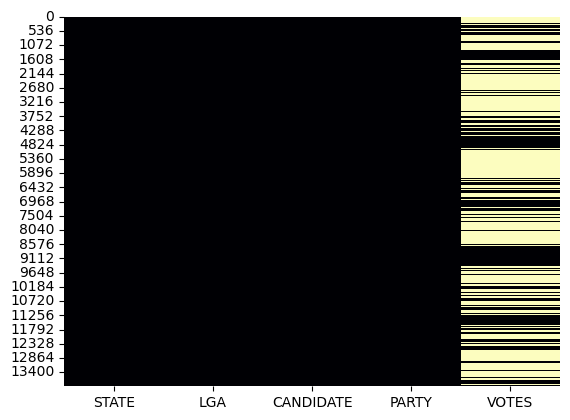

In [129]:
#Missing data visual representation.

sns.heatmap(df1.isnull(),cmap ="magma",cbar=False)
plt.show()

In [130]:
#From our calculation, VOTES column has 58.16% data missing.

percent_missing = df1.isnull().sum()*100/len(df1)
percent_missing




STATE         0.000000
LGA           0.000000
CANDIDATE     0.000000
PARTY         0.000000
VOTES        58.161068
dtype: float64

In [132]:
#I dropped the null data, and named the new dataframe df2 for comparison.

df2 =df1.dropna()

In [137]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829 entries, 0 to 13917
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STATE      5829 non-null   object
 1   LGA        5829 non-null   object
 2   CANDIDATE  5829 non-null   object
 3   PARTY      5829 non-null   object
 4   VOTES      5829 non-null   object
dtypes: object(5)
memory usage: 273.2+ KB


In [139]:
#Converting VOTES column to integer and removing ',' from the values.

df2["VOTES"] = df2["VOTES"].str.replace(",","")
df2["VOTES"] = df2["VOTES"].astype('int')


/var/folders/gz/khf86byn4hb441skkcdc1x380000gn/T/ipykernel_8548/956157471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["VOTES"] = df2["VOTES"].str.replace(",","")
/var/folders/gz/khf86byn4hb441skkcdc1x380000gn/T/ipykernel_8548/956157471.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["VOTES"] = df2["VOTES"].astype('int')


In [141]:
#The changes made above.

print(df2.head(10))
df.dtypes

  STATE        LGA                      CANDIDATE PARTY  VOTES
0  Abia  Aba North              Tinubu Bola Ahmed   APC    190
1  Abia  Aba North                 Abubakar Atiku   PDP    428
2  Abia  Aba North              Obi Peter Gregory    LP  35898
3  Abia  Aba North  Musa Mohammed Rabiu Kwankwaso  NNPP     94
4  Abia  Aba North                Kachikwu Dumebi   ADC     18
5  Abia  Aba North   Umeadi Peter Nnanna Chukwudi  APGA    368
6  Abia  Aba North              Sani Yabagi Yusuf   ADP      9
7  Abia  Aba North     Imumolen Irene Christopher     A     14
8  Abia  Aba North               Almustapha Hamza    AA      5
9  Abia  Aba North         Sowore Omoyele Stephen   AAC      5


STATE         object
LGA           object
CANDIDATE     object
PARTY         object
VOTES        float64
dtype: object

In [144]:
#Number of States in Data sets, with the states below

print(f"The number of states that participated are: {len(df2['STATE'].unique())}")
print(df2['STATE'].unique())

The number of states that participated are: 37
['Abia' 'Adamawa' 'Akwa Ibom' 'Anambra' 'Bauchi' 'Bayelsa' 'Benue' 'Borno'
 'Cross River' 'Delta' 'Ebonyi' 'Edo' 'Ekiti' 'Enugu' 'Gombe' 'Imo'
 'Jigawa' 'Kaduna' 'Kano' 'Katsina' 'Kebbi' 'Kogi' 'Kwara' 'Lagos'
 'Nasarawa' 'Niger' 'Ogun' 'Ondo' 'Osun' 'Oyo' 'Plateau' 'Rivers' 'Sokoto'
 'Taraba' 'Yobe' 'Zamfara' 'Federal Capital Territory (FCT)']


In [151]:
#I group the multiple lines/instance of state into 1 for analysis

state_group1 = df1.groupby('STATE')
state_group2 = df2.groupby('STATE')

In [182]:
#Number of Local Government Areas in respective states, this will also be shown in visualization.

df3 = state_group1[['LGA']].nunique()
df4 = state_group2[['LGA']].nunique()

In [188]:
df3 = df3.merge(df4, how='inner',on='STATE', suffixes=('_total', '_with_results'))

In [189]:
df3

,LGA_total,LGA_with_results
STATE,,
Abia,17,4
Adamawa,21,13
Akwa Ibom,31,25
Anambra,21,21
Bauchi,20,9
Bayelsa,8,8
Benue,23,2
Borno,27,4
Cross River,18,3


#### The chart below shows comparison of the number of LGAs in the respective states to the number of LGAs with results the data provided me with. Anambra, Bayelsa, Enugu, Ekiti, Kwara, Osun and FCT had results in all its LGAs as at the time of this report.

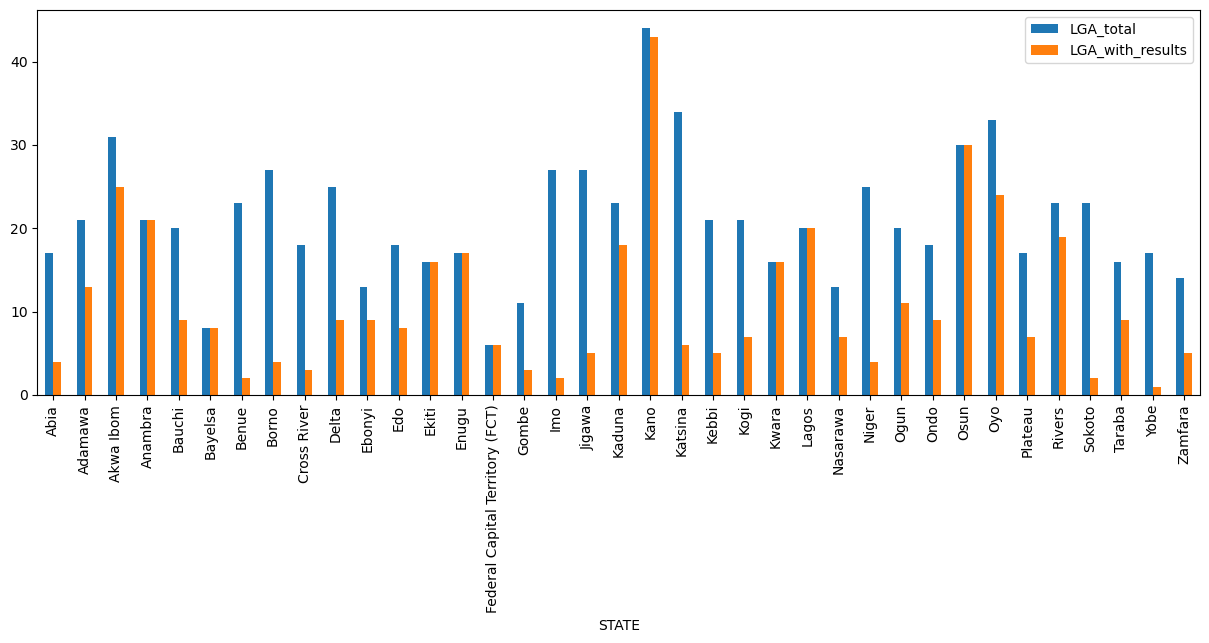

In [193]:
df3.plot(kind='bar', figsize = (15,5))
plt.show()

In [250]:
# Calculation for total votes and  votes per candidate.

print(f" Total number of Votes in the data provided: {df2['VOTES'].sum()}")

candidates_gp = df2.groupby('CANDIDATE')["VOTES"].sum()
candidates_gp = candidates_gp.to_frame().sort_values('VOTES', ascending=False)


votes_percent = (df2.groupby('CANDIDATE')["VOTES"].sum()/df2["VOTES"].sum()*100).to_frame().sort_values('VOTES', ascending =False)


candidates_gp = candidates_gp.merge(votes_percent, how='inner',on='CANDIDATE', suffixes=('', '_IN_PERCENTAGE'))
candidates_gp

 Total number of Votes in the data provided: 13216987


,VOTES,VOTES_IN_PERCENTAGE
CANDIDATE,,
Tinubu Bola Ahmed,4603978,34.833794
Obi Peter Gregory,3932488,29.753286
Abubakar Atiku,3233442,24.464290
Musa Mohammed Rabiu Kwankwaso,1148569,8.690097
Adebayo Adewole Ebenezer,45535,0.344519
Kachikwu Dumebi,41381,0.313090
Nwanyanwu Daniel Daberechukwu,40808,0.308754
Imumolen Irene Christopher,39838,0.301415
Ado-Ibrahim Abdulmalik,32509,0.245964


In [233]:
#Top 5 states with the most votes.

state_votes = state_group2['VOTES'].sum().to_frame().sort_values('VOTES', ascending=False)
state_votes.head()

,VOTES
STATE,
Kano,1631459
Lagos,1259384
Kaduna,1103087
Osun,724397
Anambra,613174


In [226]:
# Test for correlation between number of LGAs and Votes obtained.

df3_corr = state_group1[['LGA']].nunique()
df3_corr = df3_corr.merge(state_votes, how='inner',on='STATE', suffixes=('', ''))
df3_corr.corr()

,LGA,VOTES
LGA,1.000000,0.380194
VOTES,0.380194,1.000000


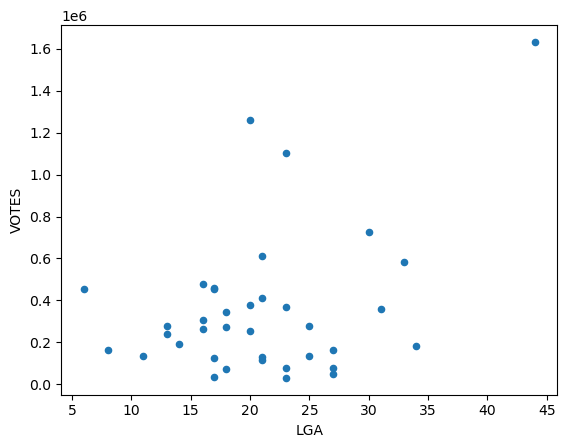

In [229]:
#Scatter plot visualization of number of LGAs to Votes obtained. 
#The above corr() function gives a value of 0.380194, meaning positive weak correlation

df3_corr.plot(kind='scatter', x='LGA', y='VOTES')
plt.show()

## Summary
### The results of the data provided are as follows.

In [252]:
candidates_gp.head(3)

,VOTES,VOTES_IN_PERCENTAGE
CANDIDATE,,
Tinubu Bola Ahmed,4603978,34.833794
Obi Peter Gregory,3932488,29.753286
Abubakar Atiku,3233442,24.464290
